# 优化后的猫狗分类器

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
import matplotlib.pyplot as plt
from keras import models
from keras import layers

datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [15]:
train_cats_dir  = './cats_and_dogs_small/train/cats'
train_dir  = './cats_and_dogs_small/train'
validation_dir  = './cats_and_dogs_small/validation'

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [20]:
from keras import optimizers

In [21]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [22]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150),batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150),batch_size=32,class_mode='binary')

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)
model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 117s - loss: 0.6905 - acc: 0.5216 - val_loss: 0.6821 - val_acc: 0.5641
Epoch 2/100
100/100 [==============================] - 111s - loss: 0.6807 - acc: 0.5572 - val_loss: 0.6627 - val_acc: 0.5870
Epoch 3/100
100/100 [==============================] - 111s - loss: 0.6709 - acc: 0.5778 - val_loss: 0.6449 - val_acc: 0.6218
Epoch 4/100
100/100 [==============================] - 112s - loss: 0.6564 - acc: 0.6006 - val_loss: 0.7130 - val_acc: 0.5309
Epoch 5/100
100/100 [==============================] - 112s - loss: 0.6359 - acc: 0.6284 - val_loss: 0.5991 - val_acc: 0.6572
Epoch 6/100
100/100 [==============================] - 112s - loss: 0.6138 - acc: 0.6550 - val_loss: 0.5858 - val_acc: 0.6821
Epoch 7/100
100/100 [==============================] - 112s - loss: 0.6025 - acc: 0.6759 - val_loss: 0.6183 - val_acc: 0.6390
Epoch 8/100
100/100 [=============

100/100 [==============================] - 111s - loss: 0.4034 - acc: 0.8144 - val_loss: 0.3955 - val_acc: 0.8306
Epoch 65/100
100/100 [==============================] - 110s - loss: 0.4196 - acc: 0.8066 - val_loss: 0.4124 - val_acc: 0.8217
Epoch 66/100
100/100 [==============================] - 110s - loss: 0.4078 - acc: 0.8109 - val_loss: 0.4330 - val_acc: 0.8080
Epoch 67/100
100/100 [==============================] - 111s - loss: 0.4069 - acc: 0.8066 - val_loss: 0.3824 - val_acc: 0.8428
Epoch 68/100
100/100 [==============================] - 111s - loss: 0.3915 - acc: 0.8169 - val_loss: 0.4719 - val_acc: 0.8093
Epoch 69/100
100/100 [==============================] - 111s - loss: 0.4024 - acc: 0.8181 - val_loss: 0.3782 - val_acc: 0.8499
Epoch 70/100
100/100 [==============================] - 111s - loss: 0.4056 - acc: 0.8150 - val_loss: 0.3969 - val_acc: 0.8306
Epoch 71/100
100/100 [==============================] - 111s - loss: 0.3886 - acc: 0.8206 - val_loss: 0.4344 - val_acc: 0.80

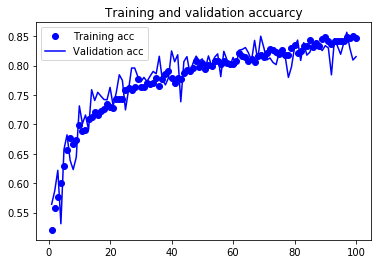

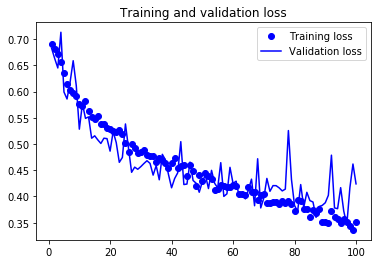

In [23]:
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuarcy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
